### Сортировка списков

1) Выучить наизусть сортировку пузырьком и быструю сортировку.
2) Реализовать дополнительно 2 любые сортировки кроме вышеуказанных. Написать тесты на эти функции.
3) Создать список из 10000 случайных чисел с плавающей запятой.
4) Замерить и вывести время выполнения, пузырьком, быстрой сортировки, ваших 2 сортировок и встроенной сортировки python.
5) Создать список из 20000 случайных чисел с плавающей запятой. Сравните как изменилось время выполнения. 
(если на вашем компьютере это выполняется слишком долго больше минуты или не хватает памяти возьмите меньшее число элементов, например 2000 / 4000)
6) Сделайте выводы по результатам, они достаточно интересные. Если будут вопросы спросите преподавателя.

# Сортировка пузырьком

«Кто больше, тот быстрее всплывает»

Как дурак, но после нахождения неупорядоченной пары меняем элементы местами и идем дальше (не начиная заново до полного прохождения списка). После первого прохода находим максимальный элемент. Асимптотика 𝑂(𝑛2)

In [27]:
def BubbleSort(arr):
    stop = len(arr)
    while stop > 1:
        for i in range(stop - 1):
            if arr[i + 1] < arr[i]:
                arr[i + 1], arr[i] = arr[i], arr[i + 1]
        stop -= 1

# Быстрая сортировка Хоара

В этом алгоритме мы разбиваем список при помощи опорного элемента, сортируя значения вокруг него на меньшие и большие. Наилучшая производительность достигается тогда, когда опорный элемент делит список примерно пополам.

**Характеристики:**

- рекурсивный;
- неустойчивый; (из-за рандомного выбора опорного элемента)
- преобразует входные данные без использования вспомогательной структуры
данных (in place);
- имеет сложность 𝜊(𝑛 log 𝑛);
- 
**Асимптотика:** Сложность алгоритма быстрой сортировки Хоара зависит от метода выбора барьерного элемента. В лучшем случае при каждом выборе барьерного элемента должен выбираться медианный элемент массива. Но поиск медианного элемента — сложная задача, её нельзя решить быстро. Если выбрать первый элемент фрагмента списка или последний A, то если список A уже упорядочен, сложность алгоритма будет 𝜊(𝑛^2) так как на каждом рекурсивном вызове от большей части списка будет отделяться всего один элемент.
  
Поэтому в алгоритме быстрой сортировки Хоара, как правило, в качестве барьерного элемента выбирается случайный элемент списка. Тогда алгоритм становится вероятностным — время его работы зависит от того, каким будет случайно выбранный элемент. Возможна (но крайне маловероятна) ситуация, когда всегда будет выбираться наименьший элемент, и в этом случае алгоритм будет работать за 𝜊(𝑛^2) В теории вероятностей доказывается, чти при случайном выборе элемента списка и разбиении его на две части, размер большей из двух получившихся частей будет в среднем равен 3𝑛/4. В этом случае глубина рекурсии в среднем будет составлять порядка log 𝑛, а средняя сложность алгоритма быстрой сортировки Хоара — 𝜊(𝑛 log 𝑛) .

In [28]:
def QuickSort(A, l, r ):
    if l >= r:
        return 
    else:
        q = random.choice(A[l:r + 1]) 
        i= l
        j= r
        while i <= j:
            while A[i] < q:
                i += 1
            while A[j] > q:
                j -= 1
            if i <= j:
                A[i], A[j] = A[j], A[i]
                i += 1
                j -= 1
                QuickSort(A, l, j)
                QuickSort(A, i, r)

# Сортировка слиянием 

In [29]:
def merge_sort(arr):
    median_index = round(len(arr)/2) 
    # print('_____________________________')
    # print('Разбиваю', arr, 'на' , (arr[:median_index], arr[median_index:]), sep = '\n')
   
    if len(arr) <= 1:
        return arr

    else:
        return merge(merge_sort(arr[:median_index]), merge_sort(arr[median_index:]))

def merge(arr1, arr2):
    
    result = []
    first_index = 0
    second_index = 0
    # print('_____________________________')
    # print('Объединяю ', arr1, arr2)
    while first_index < len(arr1) and second_index < len(arr2): 
        if arr1[first_index] < arr2[second_index]:
            result.append(arr1[first_index])
            first_index += 1
        else:
            result.append(arr2[second_index])
            second_index += 1

    result.extend(arr1[first_index:])
    result.extend(arr2[second_index:])
    # print(result)
    # print('_____________________________')
    return result
    

In [30]:
arr = [3, 6, 8, 10, 1, 2, 9, 7, 5, 4]
sorted_arr = merge_sort(arr)
sorted_arr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Сортировка вставкой 
Нужный элемент “тащим” влево

Сортируем список по частям. Начинаем с первого элемента: один элемент = отсортированный список. Теперь смотрим два элемента - сортируем пару. Добавляем следующий элемент, сортируем (двигаем на свое место в маленьком подсписке) и так далее. Получается, что мы добавляем каждый раз к отсортированному списку только одно число, которое нужно вставить на свое место.

Асимптотика 𝑂(𝑛2) (но это лишь в худшем случае - если список отсортирован в обратном порядке, обычно эта сортировка работает значительно эффективнее - до 𝑂(𝑛))

In [31]:
def insertion_sort(arr):
    
    for i in range(len(arr)-1):
        if arr[i+1] < arr[i]:
            number  = i
            while arr[number + 1] < arr[number] and number >= 0:
                arr[number + 1], arr[number] = arr[number], arr[number + 1]
                number-=1
    return arr
        

In [32]:
arr = [3, 6, 8, 10, 0, 1, 2, 9.1, 7, 5, 4, -5, 1]

In [33]:
insertion_sort(arr)

[-5, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9.1, 10]

# 

In [34]:
import random
import time

In [35]:
def sort(arr):
    return arr.sort()

In [36]:
def track_time(n):
    random_floats = [random.uniform(0, 1000) for _ in range(n)]
    
    functions = [ BubbleSort, QuickSort, merge_sort, insertion_sort, sorted, sort]
    
    result_time = {}
    for func in functions:
        start_time = time.time()
        if func.__name__ == 'QuickSort':
            sorted_floats = func(random_floats, 0, len(random_floats)-1)
        else: 
            sorted_floats = func(random_floats)
        end_time = time.time()
        execution_time = end_time - start_time
        print(func.__name__, execution_time)
        
        result_time[func.__name__] = execution_time
    return result_time


In [44]:
time1 = track_time(10000)

BubbleSort 6.118074893951416
QuickSort 0.013804912567138672
merge_sort 0.017993688583374023
insertion_sort 0.0009109973907470703
sorted 6.175041198730469e-05
sort 4.601478576660156e-05


In [45]:
time2 = track_time(20000)

BubbleSort 26.32635474205017
QuickSort 0.040119171142578125
merge_sort 0.041848182678222656
insertion_sort 0.002023935317993164
sorted 0.00020122528076171875
sort 0.00017786026000976562


In [41]:
import matplotlib.pyplot as plt

def plot_dictionary(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    
    plt.plot(keys, values, marker='o', linestyle='-')
    plt.xlabel('Сортировки')
    plt.ylabel('Время')
    plt.grid(True)
    plt.show()

In [43]:
plot_dictionary(time2)

NameError: name 'time2' is not defined

In [46]:
def plot_two_dictionaries(dict1, dict2):
    keys = list(dict1.keys())  # Берем ключи из первого словаря (можно взять из любого словаря)
    values1 = list(dict1.values())
    values2 = list(dict2.values())
    
    plt.plot(keys, values1, marker='o', linestyle='-', color='blue', label='10000')
    plt.plot(keys, values2, marker='o', linestyle='-', color='red', label='20000')
    plt.xlabel('Сортировки')
    plt.ylabel('Время')
    plt.legend()  # Добавляем легенду для каждой линии
    plt.grid(True)
    plt.show()

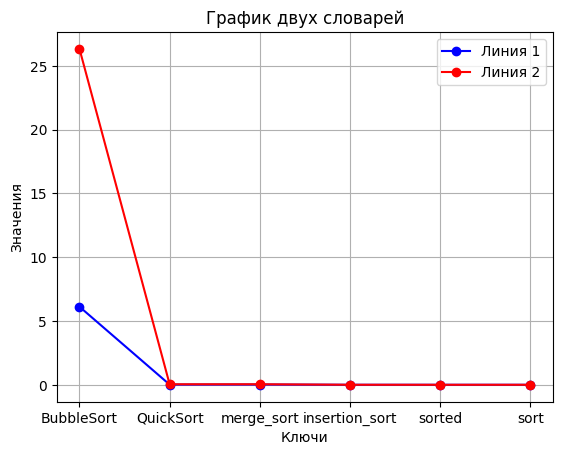

In [47]:
plot_two_dictionaries(time1, time2)

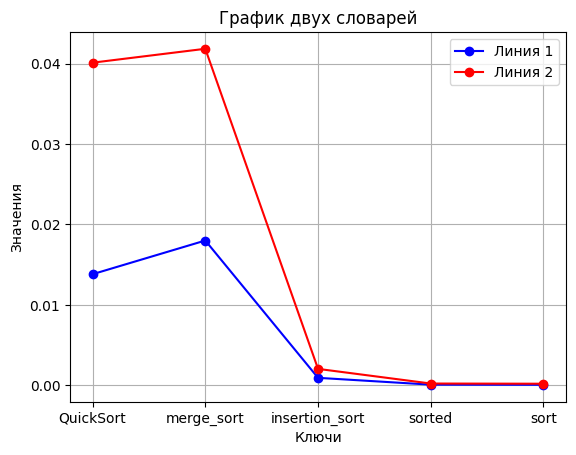

In [48]:
time1.pop('BubbleSort')
time2.pop('BubbleSort')
plot_two_dictionaries(time1, time2)

# Построим зависимости наглядно 

In [56]:
# x, y = [], []
# n = 20000
# for i in range(n):
#     x.append(i)
#     random_floats = [random.uniform(0, 1000) for _ in range(n)]

#     start_time = time.time()
#     sorted_floats = BubbleSort(random_floats)
#     end_time = time.time()
#     execution_time = end_time - start_time
#     y.append(execution_time)

In [ ]:
# plt.plot(x, y)
# plt.xlabel('Размер данных')
# plt.ylabel('Скорость работы алгоритма')
# plt.legend()  # Добавляем легенду для каждой линии
# plt.grid(True)
# plt.show()